# NLP Basic Assignment
## NLP 맛보기 - spam.csv를 가지고 유의미한 해석을 도출해주세요!

In [2]:
# 필요한 모듈 불러오기
import pandas as pd

## Load Data
- 보시면 아시다시피 spam.csv는 라벨이 있는 데이터입니다. 물론 7주차 주제가 텍스트 기초인만큼 텍스트만 활용하셔도 되고, 라벨까지 활용하셔서 모델을 돌려보셔도 좋습니다 :)

In [3]:
spam = pd.read_csv('spam.csv')

In [4]:
spam.iloc[5]['v2'] # 5번째 행의 'v2'열 값

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

In [7]:
spam.head(10) # v1이 라벨, v2가 텍스트 데이터이다.

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [25]:
spam.info() # 5572 documents

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


## Tokenizing


In [11]:
import nltk

In [107]:
# v2열 특수 문자 제거 및 소문자로 변경
import re

def cleanText(data):
  text = re.sub('[^a-zA-Z]', ' ', data).lower()
  return text

spam.v2 = spam.v2.apply(cleanText)

In [108]:
# 예시 코드 코드
from nltk.tokenize import word_tokenize

nltk.download('punkt') 
word_tokenize(spam.iloc[5]['v2'])
nltk.download('stopwords') # nltk에 저장되어 있는 불용어를 불러온다.
english_stops = list(stopwords.words('english'))


spam_tk = spam.copy()

token = []

for sentence in spam_tk.v2 : 
    words = word_tokenize(sentence) 
    words = [word for word in words if word not in english_stops] # 불용어 제거
    token.append(words)
    
spam_tk.v2 = token

[nltk_data] Downloading package punkt to /Users/oyujin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/oyujin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [109]:
spam_tk

,v1,v2
0,ham,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,"[ok, lar, joking, wif, u, oni]"
2,spam,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"[nah, think, goes, usf, lives, around, though]"
...,...,...
5567,spam,"[nd, time, tried, contact, u, u, pound, prize,..."
5568,ham,"[b, going, esplanade, fr, home]"
5569,ham,"[pity, mood, suggestions]"
5570,ham,"[guy, bitching, acted, like, interested, buyin..."


In [111]:
# 라벨 원핫인코딩
spam_tk.v1 = spam.v1.replace(['ham','spam'],[0,1])
spam_tk

,v1,v2
0,0,"[go, jurong, point, crazy, available, bugis, n..."
1,0,"[ok, lar, joking, wif, u, oni]"
2,1,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,0,"[u, dun, say, early, hor, u, c, already, say]"
4,0,"[nah, think, goes, usf, lives, around, though]"
...,...,...
5567,1,"[nd, time, tried, contact, u, u, pound, prize,..."
5568,0,"[b, going, esplanade, fr, home]"
5569,0,"[pity, mood, suggestions]"
5570,0,"[guy, bitching, acted, like, interested, buyin..."


## Word Representation

### BoW

In [122]:
from sklearn.feature_extraction.text import CountVectorizer # BOW 만들기 위함
from nltk.corpus import stopwords # 불용어 제거
import operator
import collections

# v2열의 텍스트데이터를 코퍼스 리스트의 원소로 둔다 
corpus = spam.v2 
# CountVectorizer에서 제공하는 불용어
voc = CountVectorizer(max_features = 500, stop_words = 'english', lowercase = False)
count = voc.fit_transform(corpus)

# 코퍼스로부터 각 단어의 빈도수를 기록
print('bag of words vector :', count.toarray()) 

# 각 단어의 인덱스가 어떻게 부여되었는지를 출력
print('vocabulary :',vector.vocabulary_) # dictionary, key: 단어, value: 단어의 고유 index
print('number of vocubulary :' ,len(vector.vocabulary_))# 총 단어 수: 7682

bag of words vector : [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
vocabulary : {'go': 2659, 'until': 7064, 'jurong': 3439, 'point': 4968, 'crazy': 1443, 'available': 463, 'only': 4598, 'in': 3185, 'bugis': 886, 'great': 2739, 'world': 7508, 'la': 3560, 'buffet': 884, 'cine': 1171, 'there': 6683, 'got': 2700, 'amore': 226, 'wat': 7287, 'ok': 4565, 'lar': 3593, 'joking': 3407, 'wif': 7410, 'oni': 4594, 'free': 2470, 'entry': 2061, 'wkly': 7466, 'comp': 1285, 'to': 6798, 'win': 7423, 'fa': 2197, 'cup': 1502, 'final': 2319, 'tkts': 6785, 'st': 6240, 'may': 3998, 'text': 6638, 'receive': 5350, 'question': 5244, 'std': 6282, 'txt': 6971, 'rate': 5296, 'apply': 314, 'over': 4686, 'dun': 1913, 'say': 5684, 'so': 6075, 'early': 1935, 'hor': 3027, 'already': 199, 'then': 6678, 'nah': 4310, 'don': 1824, 'think': 6699, 'he': 2886, 'goes': 2665, 'usf': 7107, 'lives': 3748, 'around': 367, 'here': 2933, 'though': 6721, 'freem

In [124]:
count_vocab = pd.DataFrame( {'word' : voc.get_feature_names(),
                           'count' : count.sum(axis = 0).flat})
count_vocab.sort_values('count', ascending = False).head(10) 

,word,count
444,ur,385
203,just,371
160,gt,318
238,lt,316
291,ok,292
139,free,288
227,ll,269
206,know,261
156,good,245
223,like,245


- ur, gt, It, ll 과 같이 의미가 분명하지 않은 단어의 빈도가 높게 나왔다.
- 이러한 단어는 불용어에 따로 추가하여 제거해주는 것이 좋겠다.
- 의미있는 단어로는 just, ok, free, know, good, like와 같은 단어의 빈도가 높다. 

In [115]:
# 단어:index dictionary를 index값 기준으로 정렬
sorted_by_value = sorted(vector.vocabulary_.items(), key=operator.itemgetter(1), reverse=False)#list
sorted_dict = collections.OrderedDict(sorted_by_value) #list를 dictionary로 변환
print(sorted_dict)

OrderedDict([('aa', 0), ('aah', 1), ('aaniye', 2), ('aaooooright', 3), ('aathi', 4), ('ab', 5), ('abbey', 6), ('abdomen', 7), ('abeg', 8), ('abel', 9), ('aberdeen', 10), ('abi', 11), ('ability', 12), ('abiola', 13), ('abj', 14), ('able', 15), ('abnormally', 16), ('about', 17), ('aboutas', 18), ('above', 19), ('abroad', 20), ('absence', 21), ('absolutely', 22), ('absolutly', 23), ('abstract', 24), ('abt', 25), ('abta', 26), ('aburo', 27), ('abuse', 28), ('abusers', 29), ('ac', 30), ('academic', 31), ('acc', 32), ('accent', 33), ('accenture', 34), ('accept', 35), ('access', 36), ('accessible', 37), ('accidant', 38), ('accident', 39), ('accidentally', 40), ('accommodation', 41), ('accommodationvouchers', 42), ('accomodate', 43), ('accomodations', 44), ('accordin', 45), ('accordingly', 46), ('account', 47), ('accounting', 48), ('accounts', 49), ('accumulation', 50), ('achan', 51), ('ache', 52), ('achieve', 53), ('acid', 54), ('acknowledgement', 55), ('acl', 56), ('acnt', 57), ('aco', 58), 

### TF-IDF 

In [116]:
import pandas as pd # 데이터프레임 사용을 위해
from math import log # IDF 계산을 위해

docs = corpus
vocab = list(vector.vocabulary_.keys())

print(vocab)
print(type(vocab))

['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'great', 'world', 'la', 'buffet', 'cine', 'there', 'got', 'amore', 'wat', 'ok', 'lar', 'joking', 'wif', 'oni', 'free', 'entry', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'receive', 'question', 'std', 'txt', 'rate', 'apply', 'over', 'dun', 'say', 'so', 'early', 'hor', 'already', 'then', 'nah', 'don', 'think', 'he', 'goes', 'usf', 'lives', 'around', 'here', 'though', 'freemsg', 'hey', 'darling', 'it', 'been', 'week', 'now', 'and', 'no', 'word', 'back', 'like', 'some', 'fun', 'you', 'up', 'for', 'still', 'tb', 'xxx', 'chgs', 'send', 'rcv', 'even', 'my', 'brother', 'is', 'not', 'speak', 'with', 'me', 'they', 'treat', 'aids', 'patent', 'as', 'per', 'your', 'request', 'melle', 'oru', 'minnaminunginte', 'nurungu', 'vettam', 'has', 'set', 'callertune', 'all', 'callers', 'press', 'copy', 'friends', 'winner', 'valued', 'network', 'customer', 'have', 'selected', 'receivea', 'prize

In [120]:
import pandas as pd # 데이터프레임 사용을 위해
from math import log # IDF 계산을 위해

N = len(docs) 

def tf(t, d):
  return d.count(t)

def idf(t):
  df = 0
  for doc in docs:
    df += t in doc
  return log(N/(df+1))

def tfidf(t, d):
  return tf(t,d)* idf(t)

In [118]:
result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)

print(tf_)

      go  until  jurong  point  crazy  available  only  in  bugis  great  ...  \
0      2      1       1      1      1          1     1   3      1      1  ...   
1      0      0       0      0      0          0     0   1      0      0  ...   
2      0      0       0      0      0          0     0   3      0      0  ...   
3      0      0       0      0      0          0     0   0      0      0  ...   
4      1      0       0      0      0          0     0   1      0      0  ...   
...   ..    ...     ...    ...    ...        ...   ...  ..    ...    ...  ...   
5567   0      0       0      0      0          0     1   1      0      0  ...   
5568   1      0       0      0      0          0     0   1      0      0  ...   
5569   0      0       0      0      0          0     0   1      0      0  ...   
5570   0      0       0      0      0          0     0   5      0      0  ...   
5571   0      0       0      0      0          0     0   0      0      0  ...   

      accent  dental  nmde 

- [5572 rows x 7682 columns] 으로 매우 차원이 높다.
- 행렬의 대부분의 원소가 0으로, 차원의 저주 문제가 발생함을 알 수 있다

In [119]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index=vocab, columns=["IDF"])
idf_

,IDF
go,1.612494
until,5.293305
jurong,7.932362
point,4.936630
crazy,5.852921
...,...
lowes,7.932362
salesman,7.932362
pity,7.932362
suggestions,7.932362


In [ ]:
result = []
N = len(docs) 

for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
print(tfidf_)

In [83]:
# 간단히 사이킷런의 TfidfVectorizer를 이용해도 된다.
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{'go': 3550, 'until': 8030, 'jurong': 4350, 'point': 5920, 'crazy': 2327, 'available': 1303, 'only': 5537, 'in': 4087, 'bugis': 1751, 'great': 3634, 'world': 8489, 'la': 4476, 'buffet': 1749, 'cine': 2048, 'there': 7645, 'got': 3594, 'amore': 1069, 'wat': 8267, 'ok': 5504, 'lar': 4512, 'joking': 4318, 'wif': 8392, 'oni': 5533, 'free': 3358, 'entry': 2949, 'wkly': 8447, 'comp': 2165, 'to': 7756, 'win': 8405, 'fa': 3087, 'cup': 2386, 'final': 3207, 'tkts': 7743, '21st': 411, 'may': 4930, '2005': 402, 'text': 7595, '87121': 784, 'receive': 6297, 'question': 6190, 'std': 7230, 'txt': 7933, 'rate': 6242, 'apply': 1156, '08452810075over18': 77, 'dun': 2802, 'say': 6633, 'so': 7024, 'early': 2823, 'hor': 3927, 'already': 1042, 'then': 7640, 'nah': 5238, 'don': 2712, 'think': 7660, 'he': 3781, 'goes': 3558, 'usf': 8075, 'lives': 4665, 'arou

## Embedding

- 수업에서 다룬 임베딩 방법에는 One-hot encoding, CBOW, Skip-gram, GloVe, FastText가 있었습니다. 다양한 시도와 '비교' 결과를 함께 적어주세요! 파라미터를 조정해가는 과정도 해석에 도움이 될 수 있겠죠 :)

## 1. One-hot Vector

- 앞서 단어 표현을 하며 만든 BoW(DTM)이 One-hot Vector이다.
- 총 단어 수: 7682 
- 단어(차원)가 너무많다. 따라서 희소벡터인 one-hot vector로 임베딩하는 것은 희소차원의 문제를 야기할 것이다. 
- 밀집벡터 형식의 Embedding Vector를 사용해보자. 

## 2. Embedding Vector

Word2Vec의 하이퍼파라미터값
- size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
- window = 컨텍스트 윈도우 크기
- min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
- workers = 학습을 위한 프로세스 수
- sg = 0은 CBOW, 1은 Skip-gram.

In [141]:
model_result = model.wv.most_similar("man")
print(model_result)

[('buy', 0.9989088177680969), ('name', 0.9988837838172913), ('give', 0.9988669753074646), ('someone', 0.9988576769828796), ('Reply', 0.9988428950309753), ('fun', 0.9988148808479309), ('Just', 0.9988034963607788), ('In', 0.9988024830818176), ('long', 0.9987886548042297), ('get', 0.9987845420837402)]


In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec

메일의 최대 길이 : 77
메일의 평균 길이 : 8.979720028715004


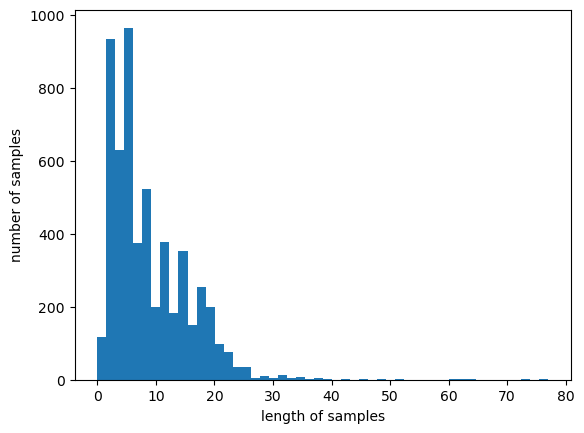

In [163]:
tokenized_data=spam_tk.v2
# 메일 길이 분포 확인
print('메일의 최대 길이 :',max(len(review) for review in tokenized_data))
print('메일의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

### CBOW 방식의 학습

In [177]:
from gensim.models import Word2Vec

model_0 = Word2Vec(tk_test['v2'], window = 5, min_count = 5, workers = 4, sg = 0)
model_0.wv.save_word2vec_format('w2v_model_0')

### Skip-Gram 방식의 학습

In [178]:
from gensim.models import KeyedVectors

model_1 = Word2Vec(tk_test['v2'], window = 5, min_count = 5, workers = 4, sg = 1)
model_1.wv.save_word2vec_format('w2v_model_1')

In [180]:
# 완성된 임베딩 매트릭스의 크기 확인
print(model_0.wv.vectors.shape)
print(model_1.wv.vectors.shape)


(2032, 100)
(2032, 100)


- Word2Vec을 이용하여 구한 Embedding Vector의 차원은 훨씬 줄어들었다.
- One-hot Encoding의 차원의 저주 문제를 어느정도 해결할 수 있다.
- 앞서 빈도가 높게 나온 just, ok, free, know, good, like와 유사한 단어를 찾아보자.

## 본인이 도출해낸 해석을 적어주세요!

- 유사도, Wordcloud, 이진 분류 모델, Plot 뭐든 상관없으니 분명하고 인상적인 해석을 적어주시면 됩니다.

## Embedding Vector: 유사도
- 임베딩 벡터의 경우 단어간의 관계를 설명할 수 있기 때문에 유사도를 파악할 수 있다.

In [183]:
print("CBOW 학습시 ok와 유사한 단어:",model_0.wv.most_similar("ok")) # cos, way, told, say, buy, much, one, place
print("SkipGram 학습시 ok와 유사한 단어:",model_1.wv.most_similar("ok")) # first, work, buy, today, one, late, feel

# 두 학습 결과에서 ok와 유사도가 높게 산출된 단어들은 실제로 유사해보이지는 않는다.

CBOW 학습시 ok와 유사한 단어: [('cos', 0.9995167255401611), ('way', 0.9995054602622986), ('told', 0.9994822144508362), ('say', 0.9994429349899292), ('buy', 0.9994370937347412), ('much', 0.999422013759613), ('one', 0.9994107484817505), ('place', 0.9994053244590759), ('thing', 0.9994006752967834), ('My', 0.9994003176689148)]
SkipGram 학습시 ok와 유사한 단어: [('first', 0.986314594745636), ('work', 0.9856892824172974), ('buy', 0.9855912327766418), ('today', 0.9819211959838867), ('one', 0.9810202717781067), ('late', 0.9806824326515198), ('feel', 0.9749603867530823), ('sleep', 0.9748330116271973), ('stuff', 0.974733829498291), ('told', 0.9741876125335693)]


In [184]:
print("CBOW 학습시 free와 유사한 단어:",model_0.wv.most_similar("free")) 
print("SkipGram 학습시 free와 유사한 단어:",model_1.wv.most_similar("free")) 

# 두 학습 결과에서 free와 유사도가 높게 산출된 단어들은 실제로 유사해보이지는 않는다.

CBOW 학습시 free와 유사한 단어: [('Reply', 0.9995219111442566), ('reply', 0.999444842338562), ('please', 0.9993388056755066), ("'", 0.9993208050727844), ('line', 0.9993200302124023), ('stop', 0.9993195533752441), ('message', 0.9993016123771667), ('draw', 0.9992972016334534), ('Nokia', 0.9992938041687012), ('use', 0.9992812871932983)]
SkipGram 학습시 free와 유사한 단어: [('reply', 0.977125883102417), ('08000930705', 0.9606202244758606), ('stop', 0.9592570662498474), ('texts', 0.9567540884017944), ('Cost', 0.954531729221344), ('08000839402', 0.9539090991020203), ('100', 0.9538966417312622), ('MobileUpd8', 0.9500541090965271), ('16', 0.9475952386856079), ('10p', 0.944944441318512)]


In [185]:
print("CBOW 학습시 know와 유사한 단어:",model_0.wv.most_similar("know")) 
print("SkipGram 학습시 know와 유사한 단어:",model_1.wv.most_similar("know")) 

# 두 학습 결과에서 know와 유사도가 높게 산출된 단어들은 실제로 유사해보이지는 않는다.

CBOW 학습시 know와 유사한 단어: [('see', 0.9988976716995239), ('could', 0.9987804293632507), ('give', 0.9986906051635742), ('let', 0.9986688494682312), ('get', 0.9986404776573181), ("'s", 0.9986228346824646), ('back', 0.9985762238502502), ('great', 0.9985641241073608), ('dont', 0.9984214901924133), ('even', 0.9984083771705627)]
SkipGram 학습시 know와 유사한 단어: [('ca', 0.9742448925971985), ("n't", 0.9716553688049316), ('let', 0.9661259651184082), ('see', 0.9609466791152954), ('think', 0.9608396291732788), ('could', 0.9544112682342529), ('want', 0.9519320726394653), ("'re", 0.9406713843345642), ('need', 0.9397567510604858), ('sure', 0.939335286617279)]


## One-hot Vector : Wordcloud
- 단어의 빈도수 기반 워드클라우드를 그려 빈도가 높은 단어를 확인할 수 있다.
- Tf-Idf 기반 워드클라우드를 그려 특정 문서에서 중요한 단어를 확인할 수 있다.


In [186]:
count_vocab

,word,count
0,able,26
1,abt,26
2,account,40
3,actually,32
4,address,22
...,...,...
495,years,28
496,yes,103
497,yesterday,24
498,yo,39


In [194]:
print(tfidfv.vocabulary_)

{'go': 3550, 'until': 8030, 'jurong': 4350, 'point': 5920, 'crazy': 2327, 'available': 1303, 'only': 5537, 'in': 4087, 'bugis': 1751, 'great': 3634, 'world': 8489, 'la': 4476, 'buffet': 1749, 'cine': 2048, 'there': 7645, 'got': 3594, 'amore': 1069, 'wat': 8267, 'ok': 5504, 'lar': 4512, 'joking': 4318, 'wif': 8392, 'oni': 5533, 'free': 3358, 'entry': 2949, 'wkly': 8447, 'comp': 2165, 'to': 7756, 'win': 8405, 'fa': 3087, 'cup': 2386, 'final': 3207, 'tkts': 7743, '21st': 411, 'may': 4930, '2005': 402, 'text': 7595, '87121': 784, 'receive': 6297, 'question': 6190, 'std': 7230, 'txt': 7933, 'rate': 6242, 'apply': 1156, '08452810075over18': 77, 'dun': 2802, 'say': 6633, 'so': 7024, 'early': 2823, 'hor': 3927, 'already': 1042, 'then': 7640, 'nah': 5238, 'don': 2712, 'think': 7660, 'he': 3781, 'goes': 3558, 'usf': 8075, 'lives': 4665, 'around': 1207, 'here': 3831, 'though': 7680, 'freemsg': 3365, 'hey': 3841, 'darling': 2443, 'it': 4218, 'been': 1460, 'week': 8313, 'now': 5420, 'and': 1084, 'n

In [196]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 5.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


<function matplotlib.pyplot.show(close=None, block=None)>

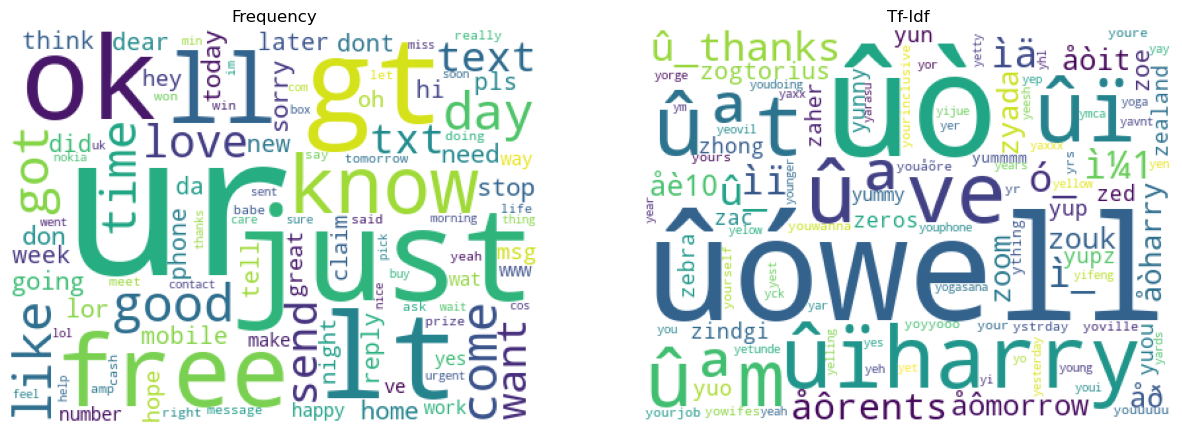

In [197]:
from wordcloud import WordCloud
wc = WordCloud(background_color='white', max_words=100, width = 400, height = 300)

plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
plt.title('Frequency') # 빈도수 기반 워드클라우드
count_dic = dict(zip(count_vocab['word'], count_vocab['count']))
cloud = wc.generate_from_frequencies(count_dic)
plt.axis('off')
plt.imshow(cloud)

plt.subplot(1,2,2)
plt.title('Tf-Idf') # Tf-Idf 점수 기반 워드클라우드
count_dic = tfidfv.vocabulary_
cloud = wc.generate_from_frequencies(count_dic)
plt.axis('off')
plt.imshow(cloud)


plt.show

- 빈도수 기반 워드클라우드 : 앞서 bow를 이용하여 구한 것과 같이 ur, ok, just, ll, gt, know, free 등의 단어가 자주 등장한다. 
- TF-IDF 기반 워드클라우드 : 특정 문서에만 자주 등장하는 단어의 tf-idf 점수가 높다. 따라서 특이한 알파벳을 가진 단어가 크게 나타났다.
